# Recomendation System Based on flipkart Reviews

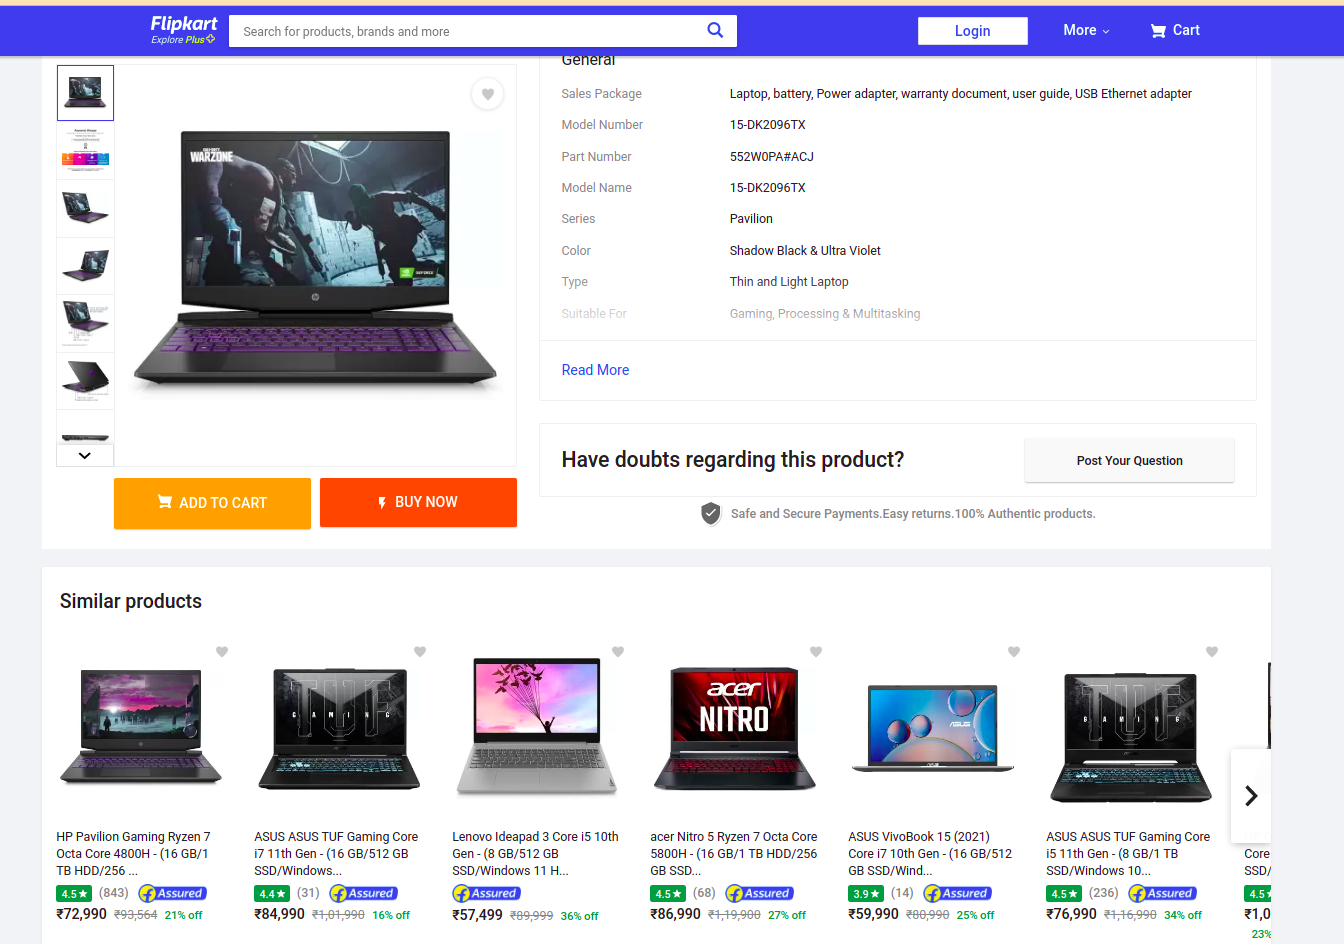

In [1]:
# Import the libraries
import numpy as np 
import pandas as pd 
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# view the dataset
df=pd.read_csv("/kaggle/input/flipkart-product-review-dataset/flipkart_product.csv", encoding="unicode_escape")
df.head() #display first five rows

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [3]:
# Data Cleaning 
def clean_and_convert_to_numeric(price_str):
    if isinstance(price_str, str):  # Check if the input is a string
        # Remove special characters regular expression
        cleaned_str = ''.join(e for e in price_str if e.isalnum() or e in ('.', '-'))
        
        # Convert the cleaned string to numeric
        try:
            numeric_value = float(cleaned_str)
            return numeric_value
        except ValueError:
            return None  # Return None for values that couldn't be converted to numeric
    else:
        return price_str  # Return the input unchanged if it's already numeric

# Apply the function to the "Price" column to clean and convert it
df['Price'] = df['Price'].apply(clean_and_convert_to_numeric)

df.head()


,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3,Fair,Ok ok product


In [4]:
# Display total number of rows and columns
num_rows, num_columns = df.shape
print(f'Total number of rows: {num_rows}')
print(f'Total number of columns: {num_columns}')

Total number of rows: 189874
Total number of columns: 5


In [5]:
#Drop null rows
df.dropna(inplace=True)

In [6]:
#Display rows after dropping null rows
total_rows = df.shape[0]
print(f'Total number of rows after dropping null values: {total_rows}')

Total number of rows after dropping null values: 54378


In [7]:
# Making sure the columns contain string value
df['Review'] = df['Review'].apply(lambda x: str(x) if not isinstance(x, str) else x)
df['Summary'] = df['Summary'].apply(lambda x: str(x) if not isinstance(x, str) else x)


In [9]:
#using the TextBlob library to analyse sentiments
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['ReviewSentiment'] = df['Review'].apply(get_sentiment)
df['SummarySentiment'] = df['Summary'].apply(get_sentiment)


In [10]:
#Combining sentiments scores from review and summary
df['CombinedSentiment'] = (df['ReviewSentiment'] + df['SummarySentiment']) / 2

In [11]:
print(df.head())

                                         ProductName   Price Rate  \
0  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0    5   
1  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0    5   
2  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0    3   
3  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0    1   
4  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0    3   

            Review                                            Summary  \
0           Super!  Great cooler.. excellent air flow and for this...   
1          Awesome             Best budget 2 fit cooler. Nice cooling   
2             Fair  The quality is good but the power of air is de...   
3  Useless product                 Very bad product it's a only a fan   
4             Fair                                      Ok ok product   

   ReviewSentiment  SummarySentiment  CombinedSentiment  
0         0.416667          0.725000           0.570833  
1         1.000000          0.

In [12]:
df['SentimentScore'] = df['CombinedSentiment']
print(df.head())

                                         ProductName   Price Rate  \
0  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0    5   
1  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0    5   
2  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0    3   
3  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0    1   
4  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0    3   

            Review                                            Summary  \
0           Super!  Great cooler.. excellent air flow and for this...   
1          Awesome             Best budget 2 fit cooler. Nice cooling   
2             Fair  The quality is good but the power of air is de...   
3  Useless product                 Very bad product it's a only a fan   
4             Fair                                      Ok ok product   

   ReviewSentiment  SummarySentiment  CombinedSentiment  SentimentScore  
0         0.416667          0.725000           0.570833        0.570833 

In [13]:
df = df.drop(['ReviewSentiment', 'SummarySentiment','CombinedSentiment' ], axis=1)


In [14]:
df.head()

,ProductName,Price,Rate,Review,Summary,SentimentScore
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Super!,Great cooler.. excellent air flow and for this...,0.570833
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Awesome,Best budget 2 fit cooler. Nice cooling,0.833333
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3,Fair,The quality is good but the power of air is de...,0.566667
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,1,Useless product,Very bad product it's a only a fan,-0.477500
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3,Fair,Ok ok product,0.600000


In [16]:
print(df['SentimentScore'].dtype)

float64


In [17]:
# Define sentiment score ranges and their corresponding numeric values
# Adjust the score ranges and values based on your specific criteria
df['SentimentCategory'] = pd.cut(df['SentimentScore'], bins=[-1, 0, 0.2, 1], labels=['Negative', 'Neutral', 'Positive'])

# Display the DataFrame with the new 'SentimentCategory' column
print(df[['SentimentScore', 'SentimentCategory']])

        SentimentScore SentimentCategory
0             0.570833          Positive
1             0.833333          Positive
2             0.566667          Positive
3            -0.477500          Negative
4             0.600000          Positive
...                ...               ...
187029        0.825000          Positive
187030        0.350000          Positive
187031        0.390000          Positive
187032        0.500000          Positive
187033        0.430000          Positive

[54378 rows x 2 columns]


In [18]:
df.head()

,ProductName,Price,Rate,Review,Summary,SentimentScore,SentimentCategory
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Super!,Great cooler.. excellent air flow and for this...,0.570833,Positive
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,5,Awesome,Best budget 2 fit cooler. Nice cooling,0.833333,Positive
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3,Fair,The quality is good but the power of air is de...,0.566667,Positive
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,1,Useless product,Very bad product it's a only a fan,-0.477500,Negative
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999.0,3,Fair,Ok ok product,0.600000,Positive


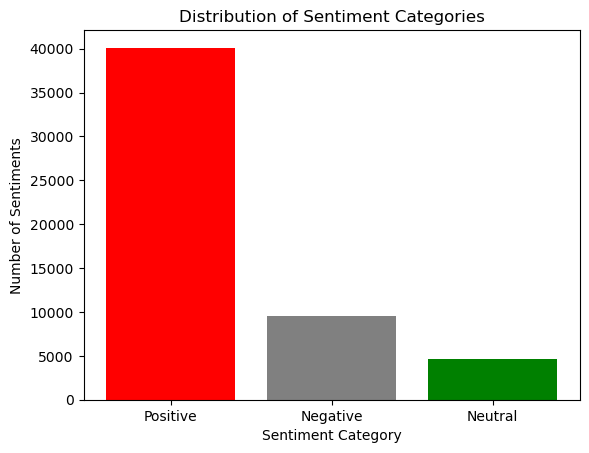

In [19]:
import matplotlib.pyplot as plt

# Assuming 'SentimentCategory' is a categorical column in your DataFrame
sentiment_counts = df['SentimentCategory'].value_counts()

# Plotting the bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'grey', 'green'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Sentiments')
plt.show()

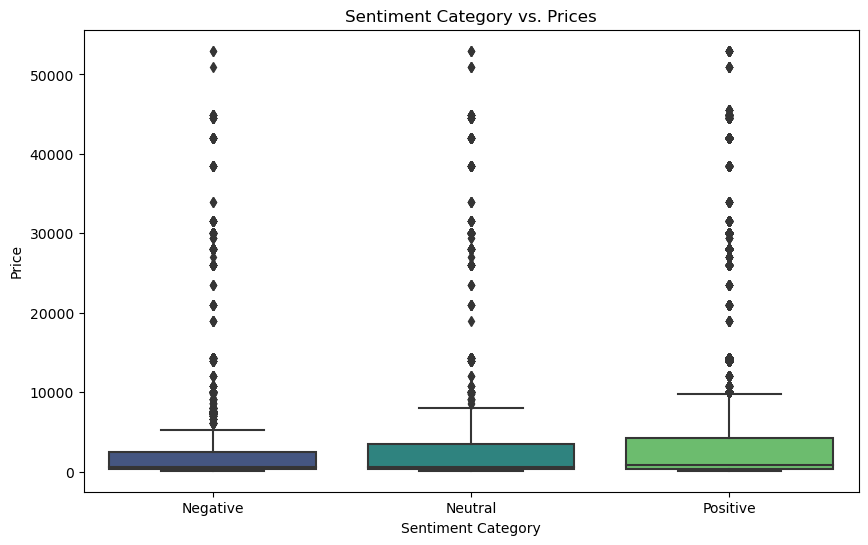

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'SentimentCategory' and 'Price' are columns in your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='SentimentCategory', y='Price', data=df, palette='viridis')
plt.title('Sentiment Category vs. Prices')
plt.xlabel('Sentiment Category')
plt.ylabel('Price')
plt.show()

In [21]:
# Calculate correlation between 'Price' and 'SentimentScore'
correlation = df['Price'].corr(df['SentimentScore'])

# Print the correlation coefficient
print(f"Correlation between 'Price' and 'SentimentScore': {correlation}")


Correlation between 'Price' and 'SentimentScore': 0.11450621179601522


**Observation:**

The positive correlation coefficient suggests a weak positive linear relationship between 'Price' and 'SentimentScore.'As 'Price' increases, there is a slight tendency for 'SentimentScore' to also increase.

Strength of the Correlation:
The correlation coefficient is relatively close to zero (0.1145), indicating a weak positive correlation. The strength of the relationship is not strong.

Interpretation:
The positive correlation suggests that, on average, products with higher prices might have slightly higher sentiment scores. However, the relationship is weak, and there could be considerable variability in sentiment scores at any given price point.

In [23]:
# Sort products by combined sentiment score in descending order
N = 100
recommended_products = df.sort_values(by='SentimentScore', ascending=False)[['ProductName', 'Price']].head(N)

# A list of top 100 products based of the customers review
print(f"Top {N} Recommended Products:")
for idx, row in recommended_products.iterrows():
    print(f"{row['ProductName']} - Price: {row['Price']}")


Top 100 Recommended Products:
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black) - Price: 699.0
Mi Box 4k Media Streaming Device?ÿ?ÿ(Black) - Price: 3999.0
NOVA Submersible NIH 430-05 1500 W Immersion Heater Rod?ÿ?ÿ(Water) - Price: 494.0
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black) - Price: 699.0
Google Nest Mini (2nd Gen) with Google Assistant Smart Speaker?ÿ?ÿ(Chalk) - Price: 3499.0
Crompton 75 L Desert Air Cooler?ÿ?ÿ(White, Teal, ACGC-DAC751) - Price: 9999.0
APPLE iPad (9th Gen) 64 GB ROM 10.2 inch with Wi-Fi Only (Space Grey) - Price: 29990.0
NOVA Submersible NIH 430-05 1500 W Immersion Heater Rod?ÿ?ÿ(Water) - Price: 494.0
Butterfly Rapid Plus 750 W Mixer Grinder (5 Jars, Ink Blue) - Price: 3399.0
Butterfly Rapid Plus 750 W Mixer Grinder (5 Jars, Ink Blue) - Price: 3399.0
APPLE iPad (9th Gen) 64 GB ROM 10.2 inch with Wi-Fi Only (Space Grey) - Price: 29990.0
Bajaj GX1 500 W Mixer Grinder - Price: 2299.0
Crompton 75 L Desert Air Cooler?ÿ?ÿ(White, Teal, ACGC-DAC7

In [24]:
#Converts non-numeric values to NAN
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

#catagorize the values based on their rating
def categorize_rating(rate):
    if rate == 5:
        return 'Excellent'
    elif rate == 4:
        return 'Good'
    elif rate == 3:
        return 'Average'
    elif rate == 2:
        return 'Poor'
    elif rate == 1:
        return 'Very Poor'
    else:
        return 'Invalid Rating'

df['RatingCategory'] = df['Rate'].apply(categorize_rating)


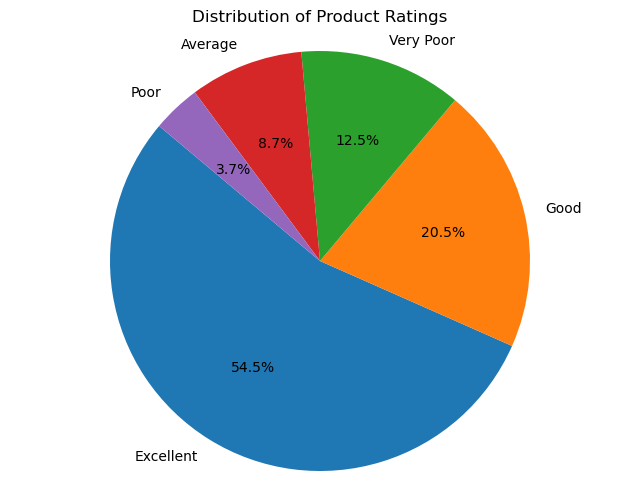

In [25]:
rating_counts = df['RatingCategory'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Product Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

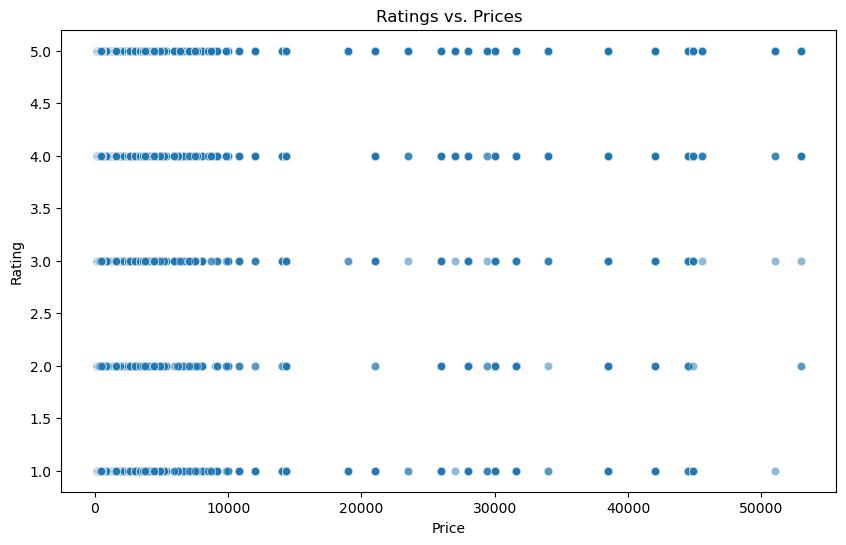

In [26]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rate', data=df, alpha=0.5)

# Set plot labels and title
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Ratings vs. Prices')

# Display the plot
plt.show()


In [27]:
# Convert the 'Price' column to numeric (if not already)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Find the highest price
highest_price = df['Price'].max()

# Find the lowest price
lowest_price = df['Price'].min()

# Print the results
print(f'Highest Price: ₹{highest_price:.2f}')
print(f'Lowest Price: ₹{lowest_price:.2f}')

Highest Price: ₹52990.00
Lowest Price: ₹127.00


In [28]:
# Convert the 'Price' column to numeric (errors='coerce' will turn non-numeric values into NaN)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with NaN values in the 'Price' column
df.dropna(subset=['Price'], inplace=True)

# Define the number of intervals and the maximum price 
num_intervals = 24  
max_price = 60000

# Generate price intervals and labels
price_intervals = np.linspace(0, max_price, num_intervals + 1)
price_labels = [f'{int(price_intervals[i]):,}-{int(price_intervals[i + 1]):,}' for i in range(num_intervals)]

# Create the 'PriceInterval' column based on intervals and labels
df['PriceInterval'] = pd.cut(df['Price'], bins=price_intervals, labels=price_labels, include_lowest=True)


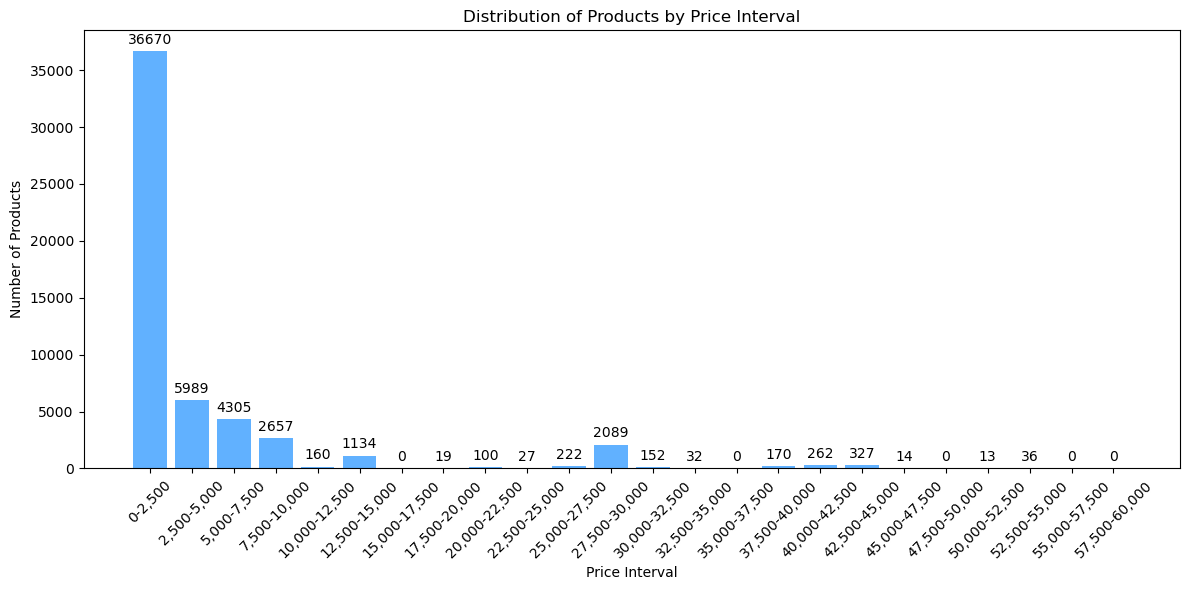

In [29]:
import matplotlib.pyplot as plt

# Count the occurrences of products in each price interval
price_interval_counts = df['PriceInterval'].value_counts().sort_index()

# Create a bar plot 
plt.figure(figsize=(12, 6))
bars = plt.bar(price_interval_counts.index, price_interval_counts.values, color='dodgerblue', alpha=0.7)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

# Customize plot labels and title
plt.xlabel('Price Interval')
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Price Interval')

# Adjust the bar width
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


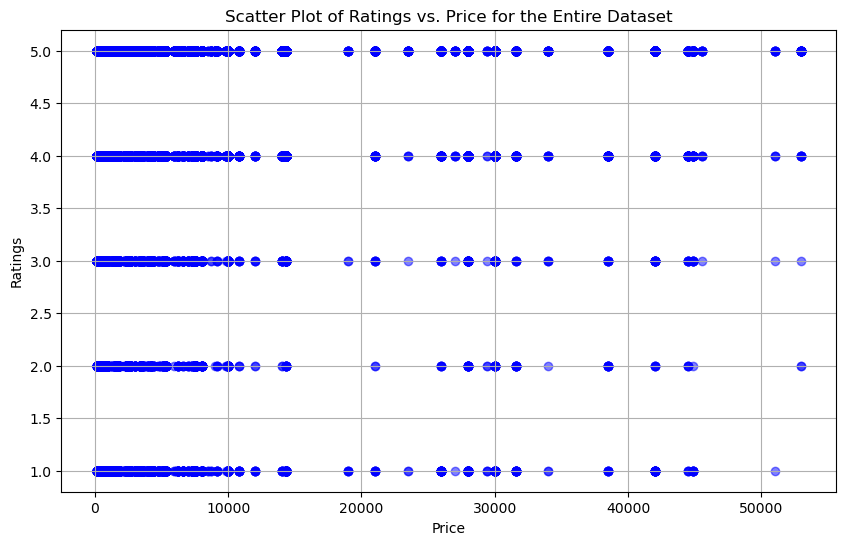

In [30]:

df['Price'] = pd.to_numeric(df['Price'])

# Ensure that 'Rate' is numeric as well (convert if needed)
df['Rate'] = pd.to_numeric(df['Rate'])

# Create a scatter plot of Rate vs. Price for the entire dataset
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Rate'], alpha=0.5, color='b')
plt.title('Scatter Plot of Ratings vs. Price for the Entire Dataset')
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()

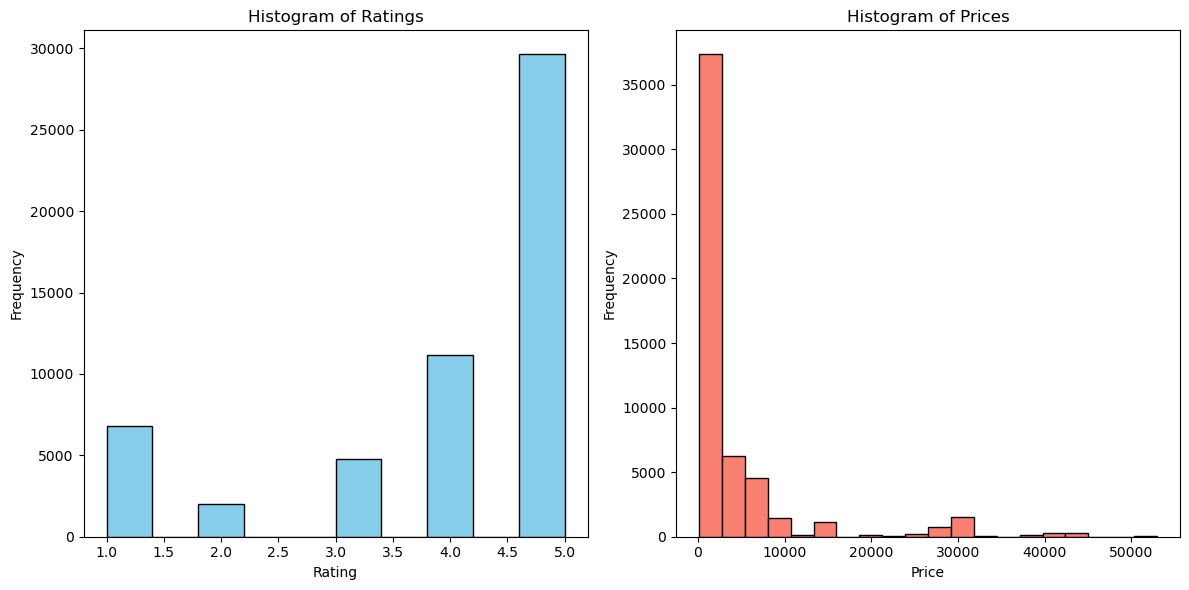

In [31]:
# Adjust Figure size
plt.figure(figsize=(12, 6))

# Histogram for Ratings (Rate)
plt.subplot(1, 2, 1)
plt.hist(df['Rate'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

# Histogram for Prices
plt.subplot(1, 2, 2)
plt.hist(df['Price'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')

# Adjust layout 
plt.tight_layout()

# Show the plots
plt.show()

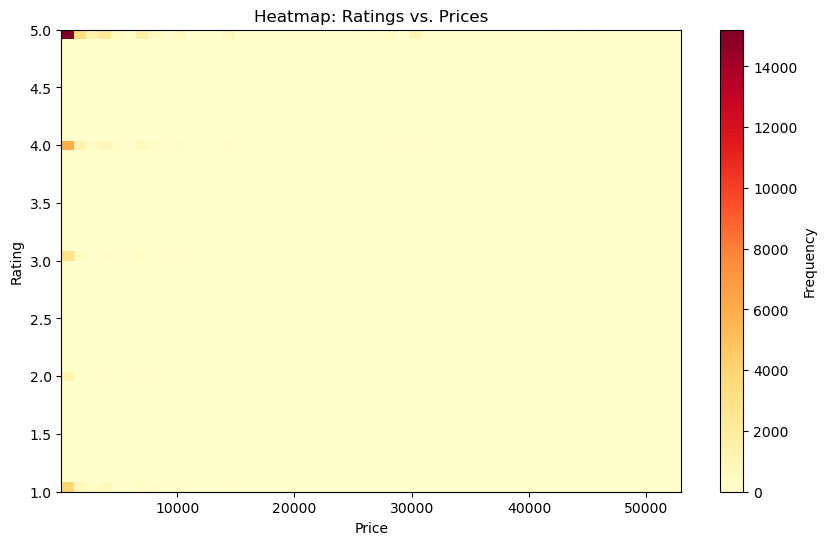

In [32]:
# Create a 2D histogram (heatmap) for Ratings vs. Prices
plt.figure(figsize=(10, 6))
plt.hist2d(df['Price'], df['Rate'], bins=(50, 50), cmap='YlOrRd')
plt.colorbar(label='Frequency')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Heatmap: Ratings vs. Prices')
plt.show()

In [33]:
# Calculate correlation between 'Price' and 'Rate'
correlation = df['Price'].corr(df['Rate'])

# Print the correlation coefficient
print(f"Correlation between 'Price' and 'Rate': {correlation}")


Correlation between 'Price' and 'Rate': 0.09691665625076284


**Observation :** 


A correlation coefficient of 0.0969 between 'Price' and 'Rate' suggests a very weak positive correlation. The correlation coefficient is relatively close to zero (0.0969), indicating a weak linear relationship between the 'Price' and 'Rate' columns.
Since the correlation coefficient is positive, it suggests that, on average, there is a slight tendency for 'Rate' (ratings) to increase as 'Price' increases. However, the correlation is weak, so this relationship is not strong or pronounced.